## Calculating Polyspectra from Dataset

### Objective

In this example, we will demonstrate how to calculate polyspectra up to a certain order from an HDF5 dataset using the `SpectrumCalculator` class from the `signalsnap` library.

### Import Required Libraries

In [7]:
from signalsnap import SpectrumCalculator, SpectrumConfig, PlotConfig


### Initialize Configuration

Here, we set up a `SpectrumConfig` object to define various parameters for calculating the spectra. The parameters include:

- `path`: The path to the HDF5 dataset.
- `group_key`: The group within the HDF5 file where the dataset resides.
- `dataset`: The specific dataset name within the group.
- `f_unit`: The unit of frequency to be used in the spectra (e.g., 'kHz').
- `spectrum_size`: The number of points in the resulting spectra.
- `order_in`: The orders of the spectra to be calculated. `'all'` means orders 1 to 4.
- `f_max`: The maximum frequency for the spectra.
- `backend`: Computational backend to be used. Choose from 'cpu', 'opencl' for AMD GPUs, or 'cuda' for Nvidia GPUs.


In [8]:
path = 'example_data/measurement.h5'
group_key = 'day1'
data_set = 'measurement1'
f_unit = 'kHz'

config = SpectrumConfig(
    path=path,
    group_key=group_key,
    dataset=data_set,
    f_unit=f_unit,
    spectrum_size=128,
    order_in='all',
    f_max=2,
    backend='cpu'
)

### Create Spectrum Calculator Object

We initialize a `SpectrumCalculator` object with the configuration settings. This object will be responsible for performing the actual calculations.


In [9]:
spec = SpectrumCalculator(config)

### Calculate the Spectra

Now, we invoke the `calc_spec()` method to calculate the spectra along with their errors.


T_window: 6.350e+01 ms
Maximum frequency: 1.250e+02 kHz


  0%|          | 0/3 [00:00<?, ?it/s]

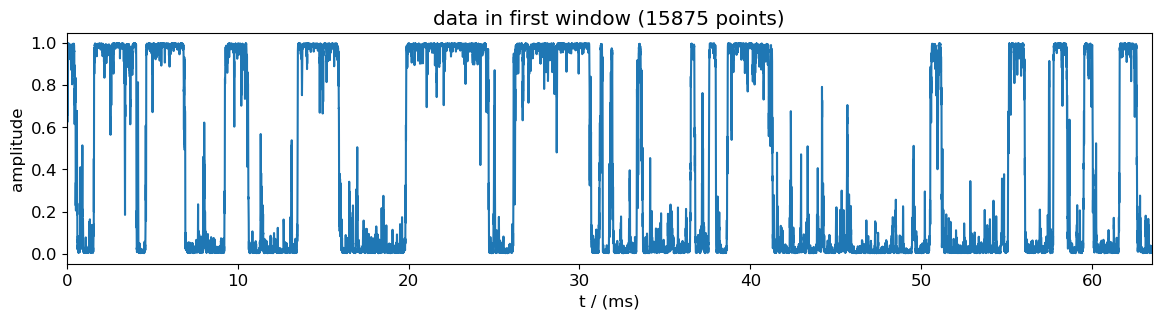

In [11]:
f, s, serr = spec.calc_spec()

### Plotting the Spectra

Finally, we plot the calculated spectra. The significance of the spectra is shown using error bands. In 2D higher-order spectra, green pixels indicate statistically non-significant results, meaning more data would be needed for an accurate estimation.

- `plot_orders`: Orders of the spectra to plot.
- `sigma`: The number of standard deviations to use for calculating error bands.


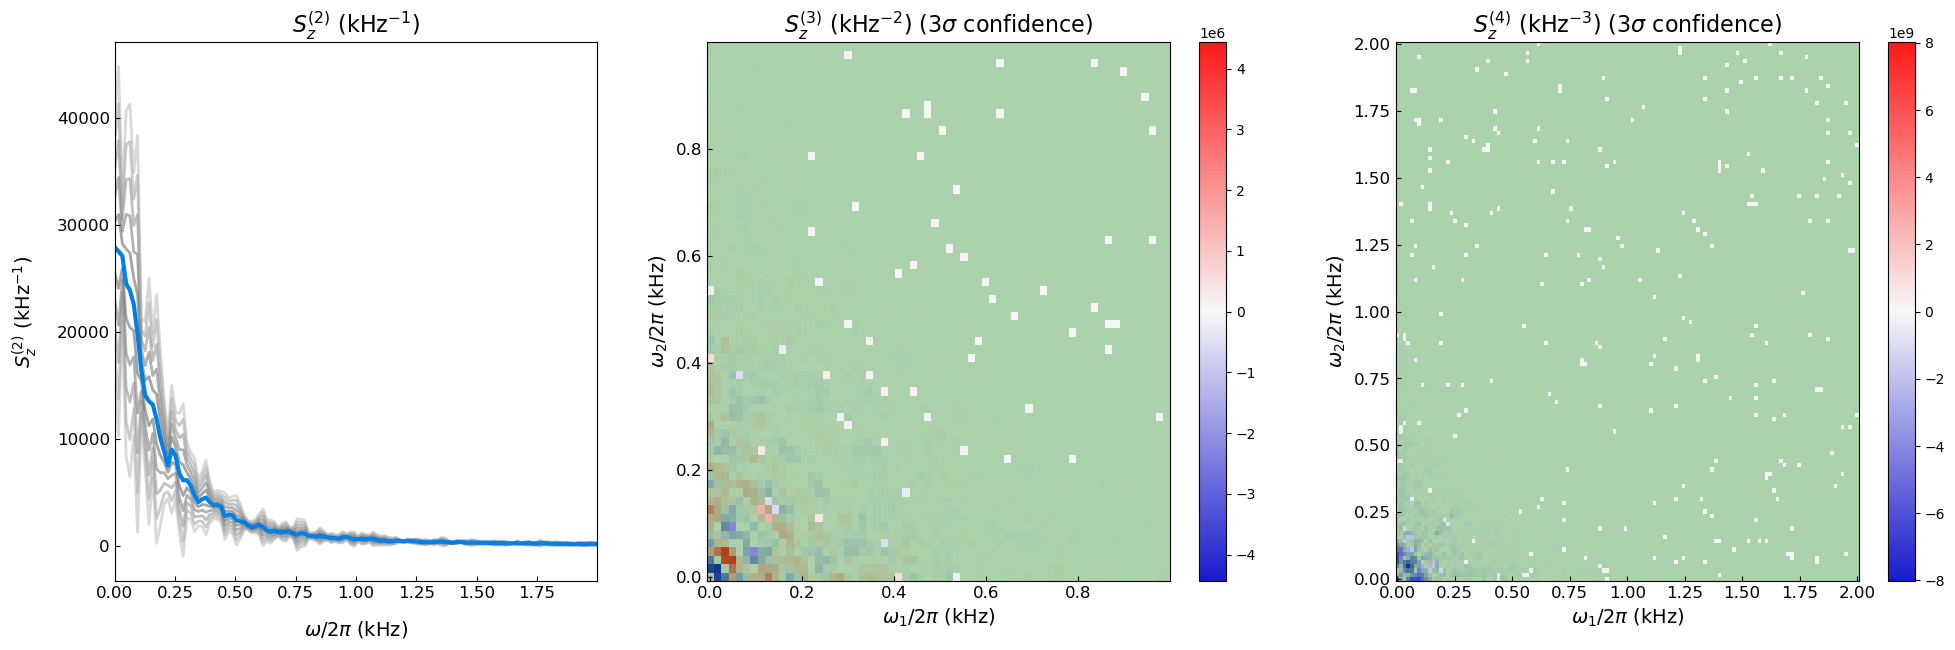

In [12]:
plot_config = PlotConfig(plot_orders=[2,3,4], sigma=3)
fig = spec.plot(plot_config)